In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Memuat dataset
data = pd.read_csv('heart.csv') 

# Melihat beberapa baris pertama dari dataset
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
# Memeriksa informasi dan tipe data
print(data.info())

# Memeriksa nilai yang hilang
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Memisahkan fitur dan target
X = data.drop('target', axis=1)  # Pastikan kolom target Anda benar
y = data['target']

In [8]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Mengubah kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
# Membagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Melihat ukuran set
print(f"Ukuran train set: {X_train.shape[0]}")
print(f"Ukuran test set: {X_test.shape[0]}")

Ukuran train set: 820
Ukuran test set: 205


In [10]:
# Membuat model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)  # Melatih model

RandomForestClassifier(random_state=42)

In [11]:
# Memprediksi hasil pada data test
rf_predictions = rf_classifier.predict(X_test)

# Melihat hasil prediksi
print("Hasil Prediksi: ", rf_predictions)

Hasil Prediksi:  [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [12]:
# Menghitung akurasi
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Akurasi Random Forest: {rf_accuracy:.2f}")

# Menampilkan classification report dan confusion matrix
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

Akurasi Random Forest: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


In [18]:
# Mengimpor library untuk Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)  # Melatih model

DecisionTreeClassifier(random_state=42)

In [19]:
# Memprediksi hasil pada data test
dt_predictions = dt_classifier.predict(X_test)

# Melihat hasil prediksi
print("Hasil Prediksi Decision Tree: ", dt_predictions)

Hasil Prediksi Decision Tree:  [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [20]:
# Menghitung akurasi
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Akurasi Decision Tree: {dt_accuracy:.2f}")

# Menampilkan classification report dan confusion matrix
print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))

Akurasi Decision Tree: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


In [21]:
# Perbandingan akurasi
print(f"Akurasi Random Forest: {rf_accuracy:.2f}")
print(f"Akurasi Decision Tree: {dt_accuracy:.2f}")

Akurasi Random Forest: 0.99
Akurasi Decision Tree: 0.99


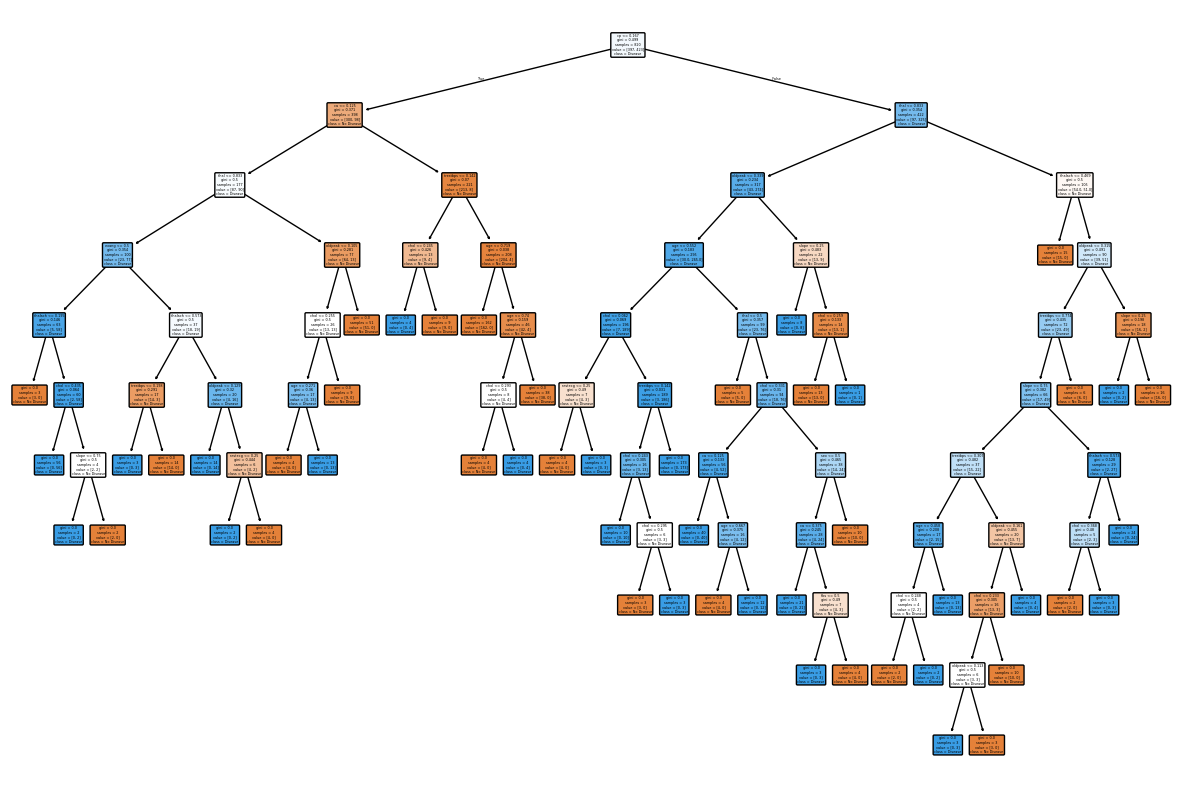

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi pohon keputusan
plt.figure(figsize=(15,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

# Cross-validation untuk Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)
print(f"Cross-validation scores for Random Forest: {cv_scores_rf}")
print(f"Mean cross-validation score: {cv_scores_rf.mean():.2f}")

Cross-validation scores for Random Forest: [1.         1.         1.         1.         0.98536585]
Mean cross-validation score: 1.00


In [24]:
# Mengimpor library untuk KNN
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # n_neighbors dapat disesuaikan
knn_classifier.fit(X_train, y_train)  # Melatih model

KNeighborsClassifier()

In [25]:
# Memprediksi hasil pada data test
knn_predictions = knn_classifier.predict(X_test)

# Melihat hasil prediksi
print("Hasil Prediksi KNN: ", knn_predictions)

Hasil Prediksi KNN:  [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0]


In [26]:
# Menghitung akurasi
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Akurasi KNN: {knn_accuracy:.2f}")

# Menampilkan classification report dan confusion matrix
print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

Akurasi KNN: 0.86
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       102
           1       0.86      0.86      0.86       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

[[87 15]
 [14 89]]


In [27]:
# Perbandingan akurasi antara Random Forest, Decision Tree, dan KNN
print(f"Akurasi Random Forest: {rf_accuracy:.2f}")
print(f"Akurasi Decision Tree: {dt_accuracy:.2f}")
print(f"Akurasi KNN: {knn_accuracy:.2f}")

Akurasi Random Forest: 0.99
Akurasi Decision Tree: 0.99
Akurasi KNN: 0.86


In [28]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk mencari n_neighbors terbaik
param_grid = {'n_neighbors': list(range(1, 21))}

# GridSearch untuk mencari n_neighbors terbaik
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print(f"Nilai K terbaik: {grid_search.best_params_['n_neighbors']}")

Nilai K terbaik: 1


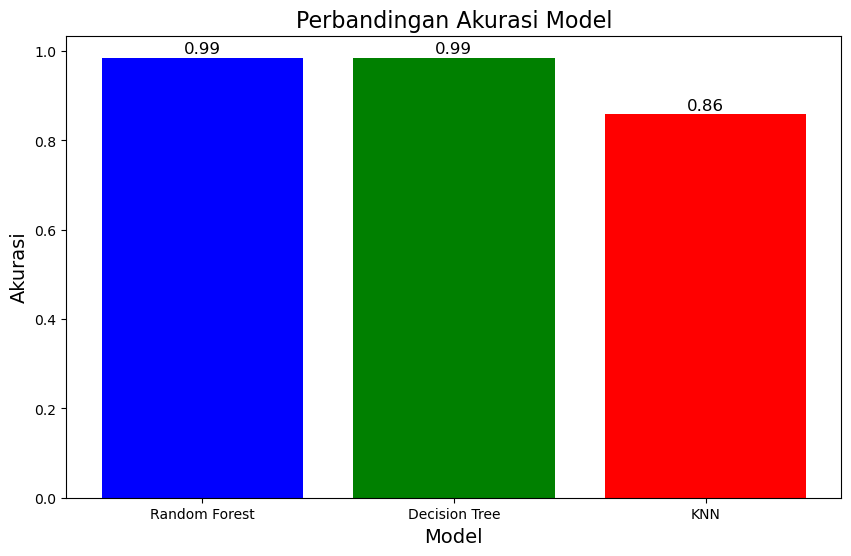

In [29]:
# Akurasi masing-masing model
models = ['Random Forest', 'Decision Tree', 'KNN']
accuracies = [rf_accuracy, dt_accuracy, knn_accuracy]

# Membuat grafik batang
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Menambahkan label dan judul
plt.xlabel('Model', fontsize=14)
plt.ylabel('Akurasi', fontsize=14)
plt.title('Perbandingan Akurasi Model', fontsize=16)

# Menampilkan nilai akurasi pada batang
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', fontsize=12)

# Menampilkan grafik
plt.show()